# Making map plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.patches import Patch
import matplotlib as mpl

### Import the data

In [122]:
# london = pd.read_csv('../data/london2022.csv')
# merseyside = pd.read_csv('../data/merseyside2022.csv')

dataset = pd.read_csv('../data/dataset2.csv')

# merseyside = dataset[dataset['PoliceDept'] == 'Merseyside']
# london = dataset[dataset['PoliceDept'] == 'London']

# https://geoportal.statistics.gov.uk/datasets/02e8d336d6804fbeabe6c972e5a27b16_0/explore?location=53.390230%2C-2.976211%2C12.31&showTable=true
lsoa_shapes = gpd.read_file('../data/mapping_csvs/LSOA_boundaries/LSOA_2021_EW_BSC_V4.shp')



merseyside = lsoa_shapes[['LSOA21CD', 'geometry']].merge(dataset[dataset['PoliceDept'] == 'Merseyside'], on='LSOA21CD', how='right')
london = lsoa_shapes[['LSOA21CD', 'geometry']].merge(dataset[dataset['PoliceDept'] == 'London'], on='LSOA21CD', how='right')


In [133]:
bins = [-float('inf'), -1, -0.5,  0, 0.5, 1, 2, float('inf')]
bin_labels = [
    '< -1',
    '-1 to -0.5',
    '-0.5 to 0',
    '0 to 0.5',
    '0.5 to 1',
    '1 to 2',
    '> 2'
]


# Define colour mapping based on the bins
cmap = mpl.cm.cividis
cmap = mpl.cm.PiYG_r
# cmap = mpl.cm.twilight



norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

## Plot the MERSEYSIDE LSOA Stop count

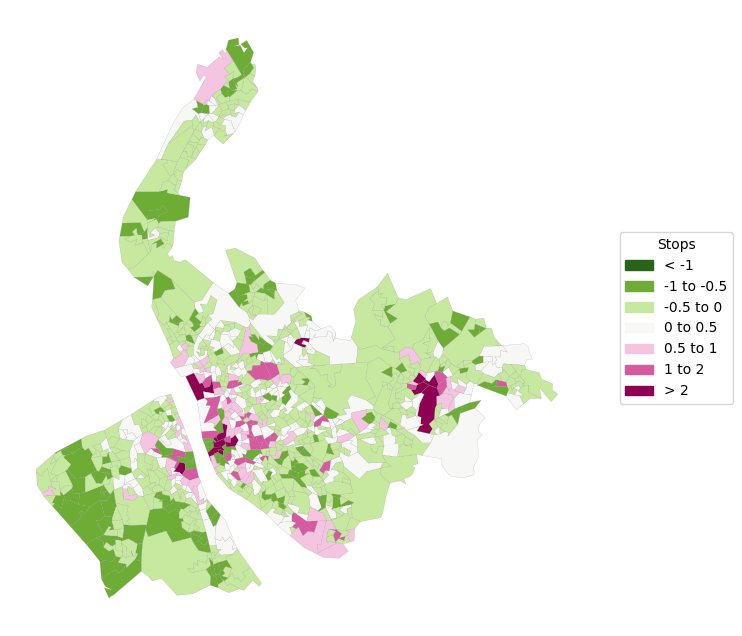

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='CrimeSum_z', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_stops_map.svg', bbox_inches='tight')

plt.show()


## Plot the LONDON LSOA Stop count

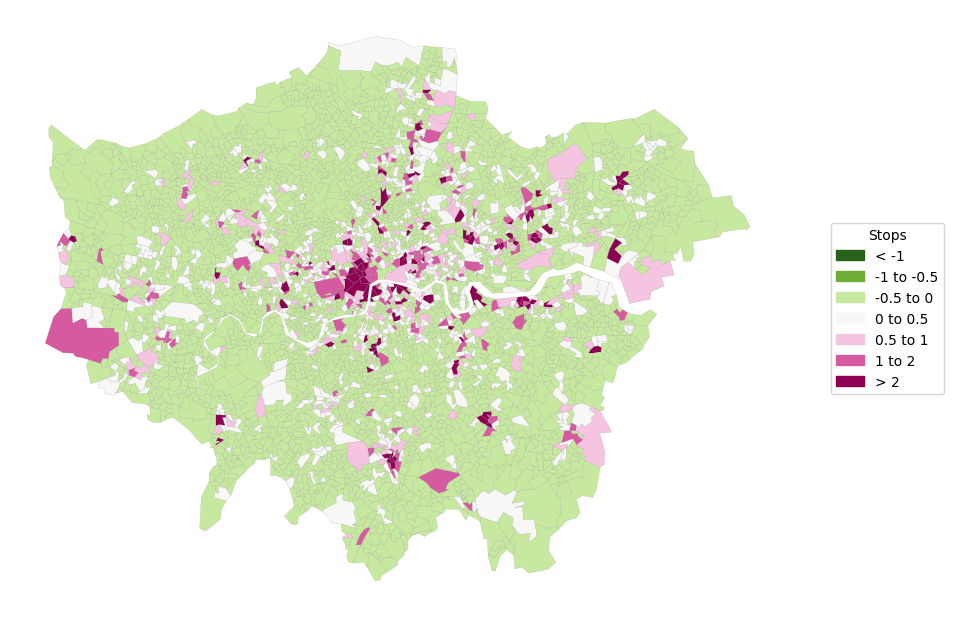

In [124]:



# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='StopCount_z', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
# plt.savefig('../figures_and_plots/london_stops_map.svg', bbox_inches='tight')

plt.show()


# Plotting the HOUSE PRICES

## Merseyside

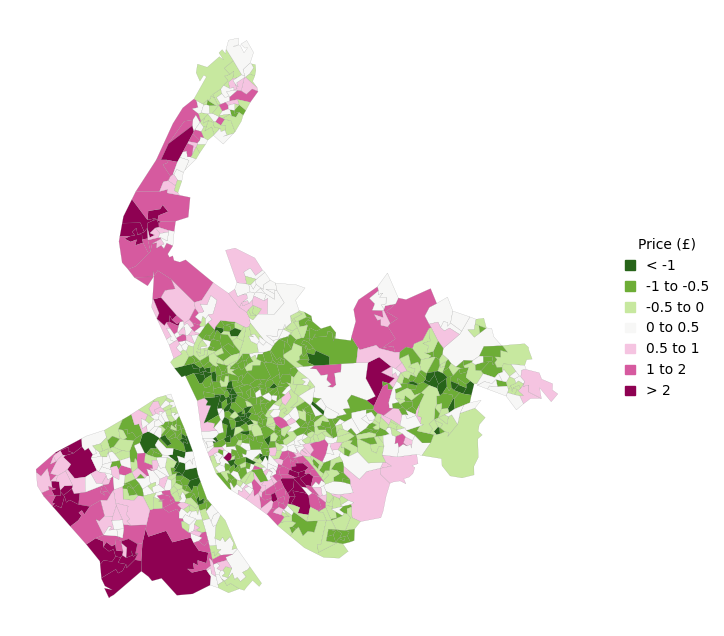

In [127]:
# # Define the bins and their labels
# bins = [50000, 99999, 149999, 199999, 299999, 499999, float('inf')]
# bin_labels = ['50k–99k', '100k–149k', '150k–199k', '200k–299k', '300k–499k', '500k+']



# # Define colour mapping based on the bins
# cmap = mpl.cm.cividis
# norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='MeanHousePrice_z', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="Price (£)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


## London

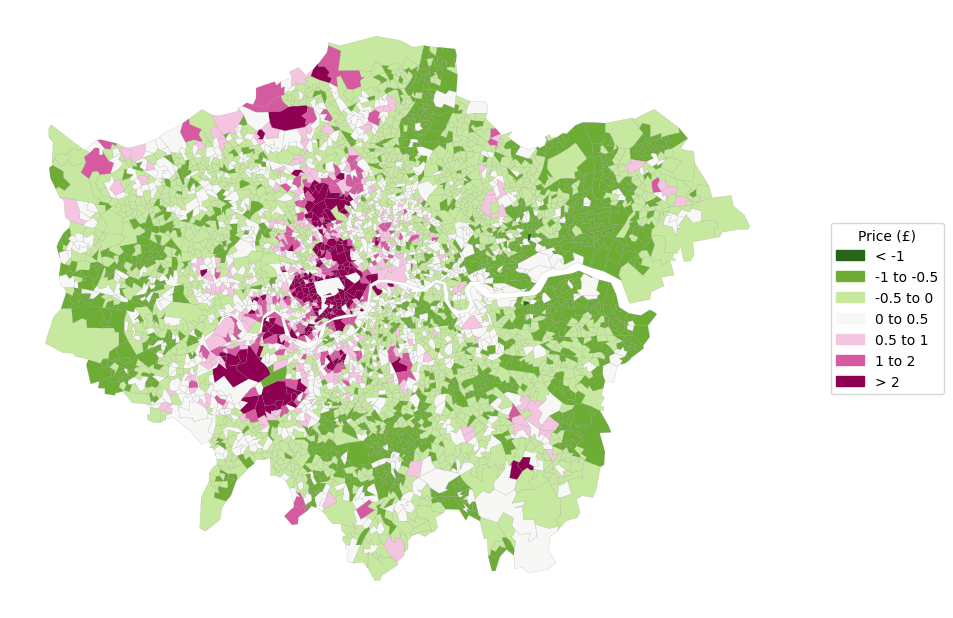

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='MeanHousePrice_z', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, title="Price (£)", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/london_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


# Plotting the Ethnic distribution

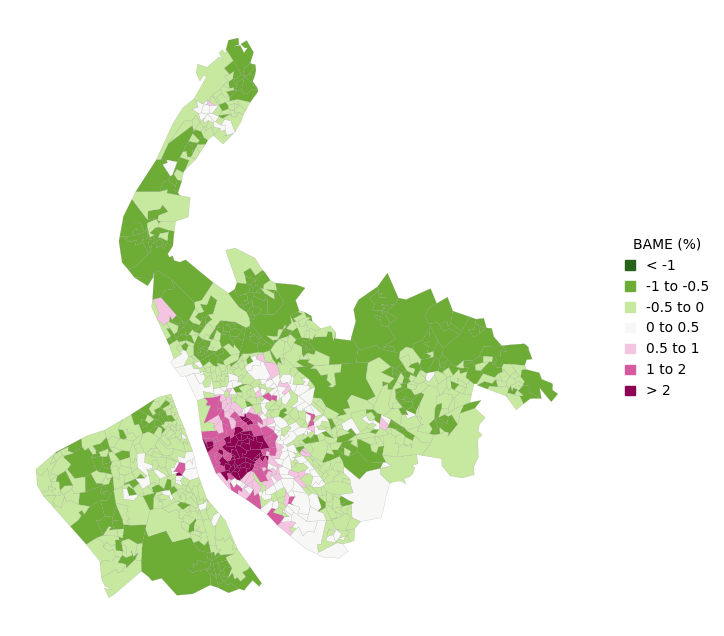

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merseyside.plot(column='BAME_z', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="BAME (%)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


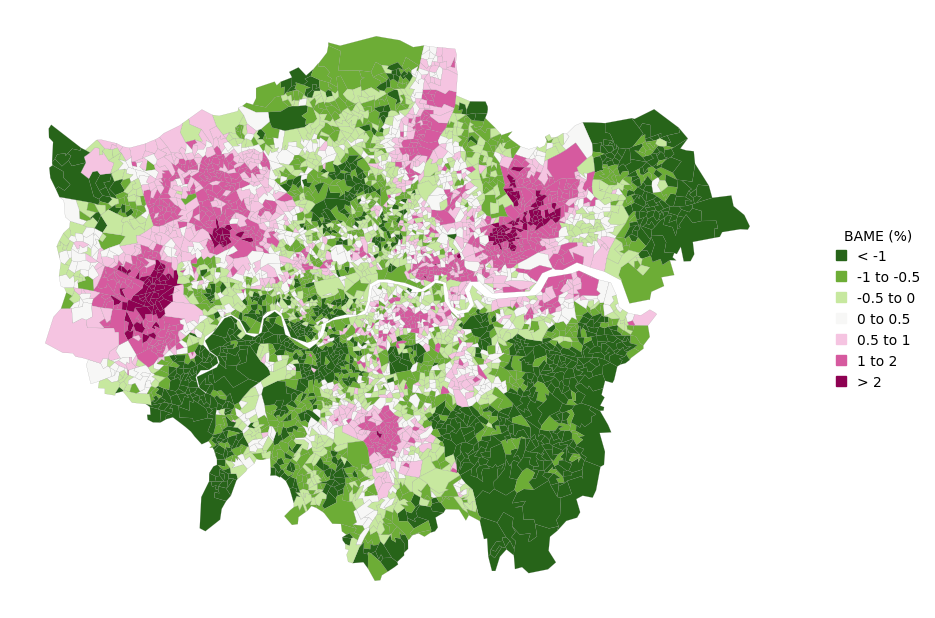

In [ ]:
# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

london.plot(column='BAME_z', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="BAME (%)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()
